<a href="https://colab.research.google.com/github/riccardo0001/Experiments/blob/main/MNIST%20exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OPTICAL CHARACTER RECOGNITION (MNIST DATASET)

In [1]:
# import the dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# fetch the data into input features X and target y
X = mnist.data
y = mnist.target.astype(int)

In [4]:
# define function to print the images
import matplotlib.pyplot as plt
def print_image(index):
  example = X.loc[index].values
  example = example.reshape(28,28)
  plt.imshow(example, cmap='GnBu')
  plt.axis('off')

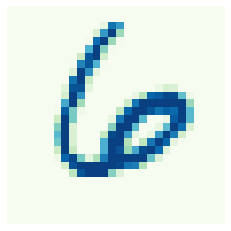

In [23]:
print_image(6526)

In [6]:
# divide into train & test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
print('Train set size:', X_train.shape)
print('Test set size:', X_test.shape)

Train set size: (56000, 784)
Test set size: (14000, 784)


In [7]:
# try with K neighbors classifier
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
KNC.predict(X_train.loc[43].values.reshape(1,784))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([9])

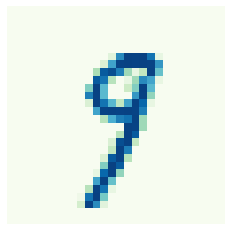

In [8]:
print_image(43)

In [9]:
# get evaluation metrics
from sklearn.model_selection import cross_val_score
knn_default = KNeighborsClassifier()
cv_scores = cross_val_score(knn_default, X_train, y_train, cv=5, scoring="accuracy")

In [13]:
import numpy as np
final_score_default = np.mean(cv_scores)
print("Accuracy with defaul KNN:", final_score_default)

Accuracy with defaul KNN: 0.9687678571428572


In [22]:
# it's good but I try better hyperparameters
from sklearn.model_selection import GridSearchCV
KNC_grid_tuned = KNeighborsClassifier()
#parameters = {'leaf_size':list(range(1,50)), 'n_neighbors':list(range(1,35)), 'p':[1,2]}
parameters = {'n_neighbors':list(range(4,7)),'weights': ['uniform', 'distance']}
grid_search = GridSearchCV(KNC_grid_tuned, parameters, cv=3, scoring='accuracy', return_train_score=True, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START n_neighbors=4, weights=uniform..............................
[CV 1/3; 1/6] END n_neighbors=4, weights=uniform;, score=(train=0.980, test=0.966) total time=  52.9s
[CV 2/3; 1/6] START n_neighbors=4, weights=uniform..............................
[CV 2/3; 1/6] END n_neighbors=4, weights=uniform;, score=(train=0.979, test=0.969) total time=  47.2s
[CV 3/3; 1/6] START n_neighbors=4, weights=uniform..............................
[CV 3/3; 1/6] END n_neighbors=4, weights=uniform;, score=(train=0.981, test=0.965) total time=  45.7s
[CV 1/3; 2/6] START n_neighbors=4, weights=distance.............................
[CV 1/3; 2/6] END n_neighbors=4, weights=distance;, score=(train=1.000, test=0.970) total time=  45.5s
[CV 2/3; 2/6] START n_neighbors=4, weights=distance.............................
[CV 2/3; 2/6] END n_neighbors=4, weights=distance;, score=(train=1.000, test=0.972) total time=  46.0s
[CV 3/3; 2/6] START n_n

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [4, 5, 6],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [26]:
# get best model
knn_tuned = grid_search.best_estimator_

y_predicted = knn_tuned.predict(X_test)

In [29]:
knn_tuned = grid_search.best_estimator_
knn_tuned

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted)

0.9731428571428572

In [ ]:
# since gridsearch takes ages, I try Randomized Search
from sklearn.model_selection import RandomizedSearchCV
KNC_grid_tuned = KNeighborsClassifier()
#parameters = {'leaf_size':list(range(1,50)), 'n_neighbors':list(range(1,35)), 'p':[1,2]}
# dont' consider leaf size to speed up convergence
parameters = {'n_neighbors':list(range(1,35)), 'p':[1,2]}
#set verbose to high integer to print out messages
random_search = RandomizedSearchCV(KNC_grid_tuned, parameters, cv=2, scoring='accuracy', return_train_score=True, verbose=10)
random_search.fit(X_train, y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV 1/2; 1/10] START n_neighbors=30, p=2........................................
[CV 1/2; 1/10] END n_neighbors=30, p=2;, score=(train=0.950, test=0.946) total time=  53.6s
[CV 2/2; 1/10] START n_neighbors=30, p=2........................................
[CV 2/2; 1/10] END n_neighbors=30, p=2;, score=(train=0.952, test=0.947) total time=  51.5s
[CV 1/2; 2/10] START n_neighbors=32, p=1........................................


In [16]:
list(range(4,7))

[4, 5, 6]